In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy
from scipy import stats 
import researchpy as rp
import cdt

In [11]:
#load experimental data 
nsw = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/nsw.dta")
del nsw['data_id']
#load non experimental data (cps)
cps1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/cps_controls.dta")
cps2 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/cps_controls2.dta")
cps3 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/cps_controls3.dta")
#load non experimental data (psid)
psid1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/psid_controls.dta")
psid2 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/psid_controls2.dta")
psid3 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/psid_controls3.dta")


## PC Algorithm

In [7]:
# Get skeleton graph
treat_0 = nsw[nsw['treat']==0]
treat_1 = nsw[nsw['treat']==0]
del treat_0['treat']
del treat_1['treat']
glasso = cdt.independence.graph.Glasso()
skeleton_treat0 = glasso.predict(treat_0)
skeleton_treat1 = glasso.predict(treat_1)

In [8]:
import cdt
import networkx as nx
cdt.SETTINGS.rpath = '/Library/Frameworks/R.framework/Versions/4.0/Resources/Rscript'

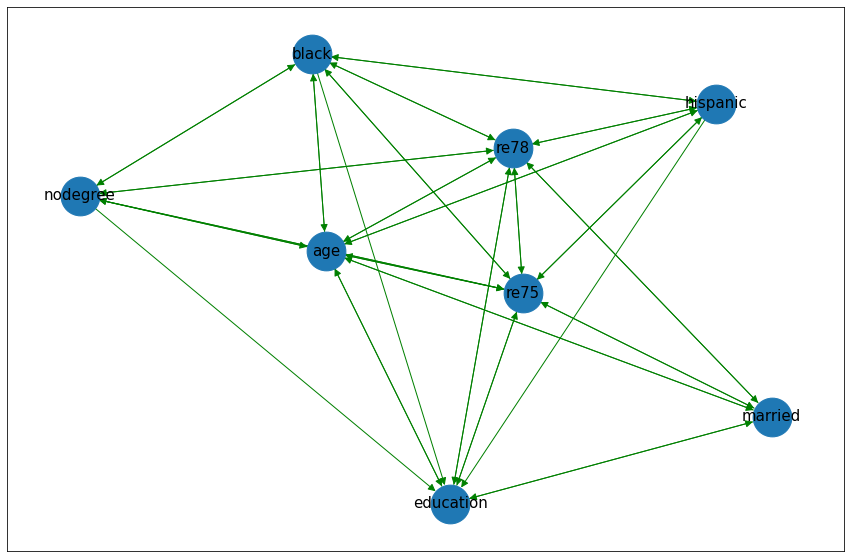

In [11]:
#Run PC algorithm
model_pc = cdt.causality.graph.PC()
graph_pc_treat0 = model_pc.predict(treat_0, skeleton_treat0)
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc_treat0, font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green')

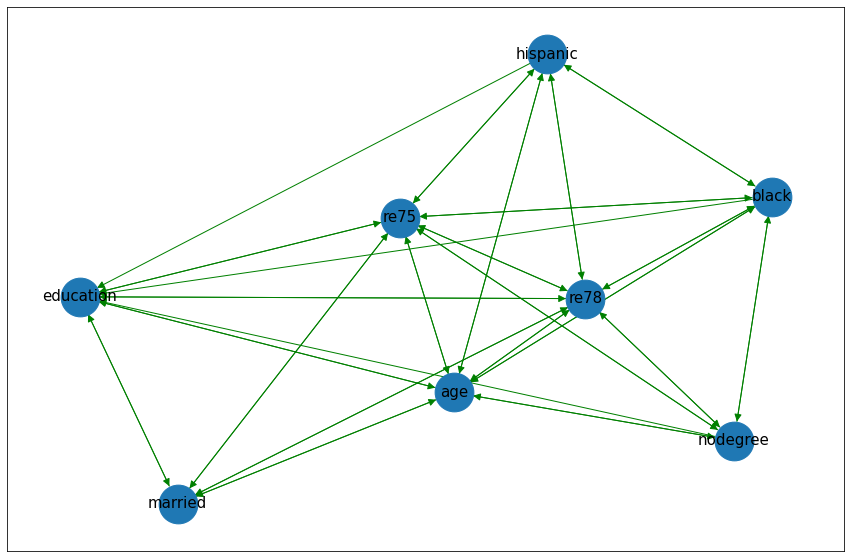

In [14]:
model_pc = cdt.causality.graph.PC()
graph_pc_treat1 = model_pc.predict(treat_1, skeleton_treat1)
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc_treat1, font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green')


PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


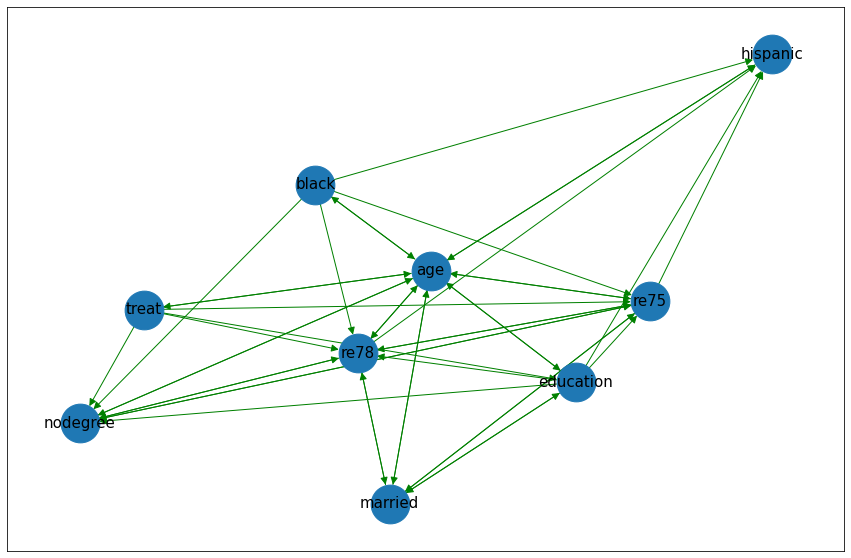

In [15]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(nsw)
model_pc = cdt.causality.graph.PC()
graph_pc_nsw = model_pc.predict(nsw, skeleton)
fig =plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc_nsw, font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green')

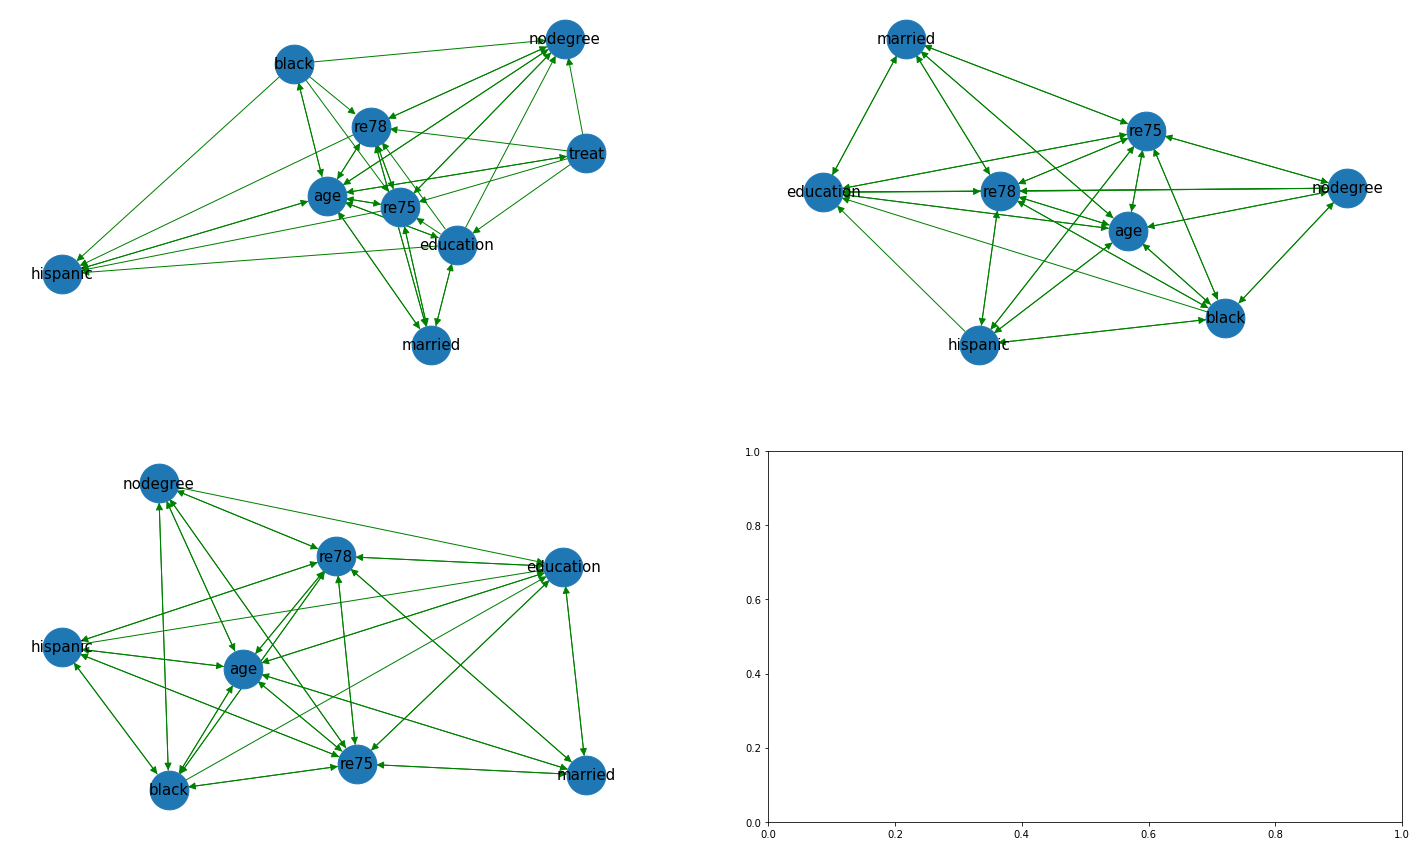

In [16]:
#Plot all graphs

graphs = [graph_pc_nsw,graph_pc_treat0,graph_pc_treat1]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(25, 15))
#fig, axs = plt.subplot_mosaic([['a)'], ['b)'], ['d)']])

ax = axes.flatten()

for i in range(3):
    nx.draw_networkx(graphs[i],font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green' , ax=ax[i])
    ax[i].set_axis_off()

plt.show()


## My own implementation of the PC algorithm

<p> generate complete, undirected graph </p>

In [1]:
import torch 
import networkx as nx

In [5]:
from torch_geometric.utils.convert import from_networkx

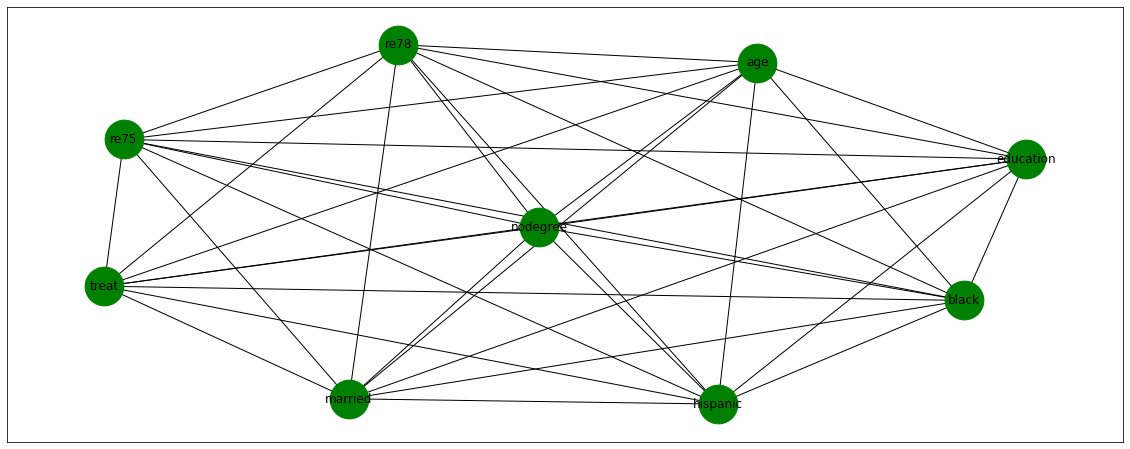

In [12]:
C = nx.complete_graph(nsw)
C_matrix = nx.to_numpy_matrix(C)
C_df = pd.DataFrame(np.matrix(C_matrix))

#Plot graph 
fig=plt.figure(figsize=(20,8))
nx.draw_networkx(C, node_color = 'green',node_size = 1500)

<p> test's for conditional independence </p>

In [15]:
pyg_graph = from_networkx(C)

Data(edge_index=[2, 72], num_nodes=9)

In [207]:
# Conditonal independence testing using the CCIT - https://arxiv.org/abs/1709.06138
from CCIT import CCIT
from CCIT import DataGen

nsw = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/nsw.dta")
del nsw['data_id']
#Normalise data between a range of 0 and 1
for col in nsw.columns:
    nsw[col] = (nsw[col] - np.min(nsw[col])) / (np.max(nsw[col]) - np.min(nsw[col])) 

# Convert variables to numpy arrays  

treat_a  = np.array([nsw['treat']])
age_a  = np.array([nsw['age']])
educ_a  = np.array([nsw['education']])
black_a = np.array(nsw['black'])
hispanic_a = np.array(nsw['hispanic'])
married_a = np.array(nsw['married'])
nodegree_a = np.array(nsw['nodegree'])
re75_a = np.array(nsw['re75'])
re78_a = np.array(nsw['re78'])

# Reshape arrays 

treat_a = treat_a.reshape(722,1)
age_a = age_a.reshape(722,1)
educ_a = educ_a.reshape(722,1)
black_a = black_a.reshape(722,1)
hispanic_a = hispanic_a.reshape(722,1)
married_a = married_a.reshape(722,1)
nodegree_a = nodegree_a.reshape(722,1)
re75_a = re75_a.reshape(722,1)
re78_a = re78_a.reshape(722,1)


## Generate sets for conditional independence testing 

emptyset = [0]*722
emptyset = np.array(emptyset)
emptyset = emptyset.reshape(722,1)

# n-dimensional arrays

z_1 = np.array(nsw[['married','hispanic','education']])


<p> Run CI test </p>

In [208]:
#0th order CI test
ci_pvals = []
pvalue = CCIT.CCIT(age_a,nodegree_a,z_1) 
ci_pvals.append(pvalue)
ci_pvals

[0.5222283244921728]

In [163]:
# Produce undirected graph F from conditional independence test and iterate 

0.5664097963506411

In [164]:
C_matrix = nx.to_numpy_matrix(C)

In [177]:
# Visualise the complete graph as a dataframe
cols = {0:'treat',1:'age',2:'education',3:'black',4:'hispanic',5:'married',6:'nodegree',7:'re75',8:'re78'}
rows = {0:'treat',1:'age',2:'education',3:'black',4:'hispanic',5:'married',6:'nodegree',7:'re75',8:'re78'}
C_df = C_df.rename(columns=cols, index=rows)
C_df

,treat,age,education,black,hispanic,married,nodegree,re75,re78
treat,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
age,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
education,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
black,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
hispanic,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
married,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
nodegree,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
re75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
re78,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [175]:
C_df 

,treat,age,education,black,hispanic,married,nodegree,re75,re78
treat,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
age,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
education,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
black,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
hispanic,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
married,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
nodegree,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
re75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
re78,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [181]:
def combs(a):
    if len(a) == 0:
        return [[]]
    cs = []
    for c in combs(a[1:]):
        cs += [c, c+[a[0]]]
    return cs

combinations = combs([0,1,2,3,4,5,6,7,8,9])